In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,347 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

In [ ]:
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (135 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126256 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


Saving Screenshot 2025-03-22 115514.png to Screenshot 2025-03-22 115514.png
✅ File uploaded: Screenshot 2025-03-22 115514.png
🔍 Processing: Screenshot 2025-03-22 115514.png


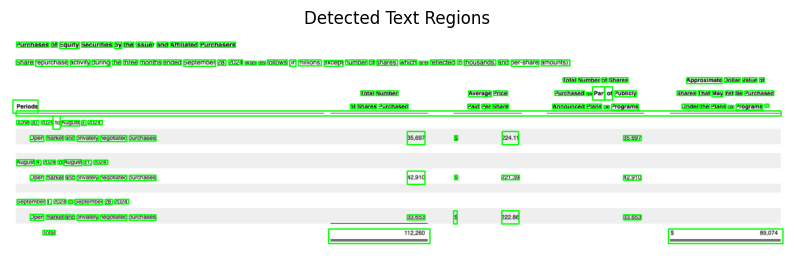


📝 **Extracted Text from Image:**

Purchases of Equity Securities by the Issuer and Affiliated Purchasers _
‘Share repurchase activity during the three months ended September 28, 2024 was as follows (in millions, except number of shares, which are reflected in thousands, and per-share amounts):
‘Totat Number af Shares Approximate Doltar Value of
‘Total Number Average Price {Purchased as Part of Publicly ‘Sharée That May Vet Be Purchased
Perlads: of Shares Purchased Pald Per Share Announced Plans or Programs Under the Plans ¢r Programs: we
June 30, 2024 to August 3; 2024;
‘August 4, 2024 to August 91, 2024:

Open market and privately negotiated purchases 42,910 $ 221.99 42.910
a
September 1, 2024 to September 28, 2024:

‘Open market and privately negotiated purchases 33,653 $ 222.06 33,653

Total 112,260 $ 89,074


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
from google.colab import files
import torch


# 1. Upload and Process PDF/Image

def upload_and_convert():
    """Allows user to upload an image or PDF and converts PDFs to images."""
    uploaded = files.upload()  # Opens file upload dialog

    if uploaded:
        file_name = list(uploaded.keys())[0]  # Get uploaded file name
        print(f"✅ File uploaded: {file_name}")

        if file_name.lower().endswith(".pdf"):
            print("📄 Converting PDF to images...")
            images = convert_from_path(file_name)
            image_paths = []
            for i, img in enumerate(images):
                img_path = f"page_{i+1}.jpg"
                img.save(img_path, "JPEG")  # Save each PDF page as an image
                image_paths.append(img_path)
            return image_paths
        else:
            return [file_name]

    return None


# 2. Preprocess Image for OCR
def preprocess_image_for_ocr(image_path):
    """Preprocess image to enhance text for OCR."""
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Error: Could not load image at path: {image_path}")
        return None


    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding for better contrast
    processed = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return processed


# 3. Extract Text Using OCR

def extract_text(image_path):
    """Extracts text from the image using Tesseract OCR."""
    processed_image = preprocess_image_for_ocr(image_path)

    if processed_image is None:
        return ""

    pil_image = Image.fromarray(processed_image)


    text = pytesseract.image_to_string(pil_image, config="--psm 6")
    return text.strip()

# 4. Draw Bounding Boxes (Optional)

def draw_bounding_boxes(image_path, save_path="output_with_boxes.jpg"):
    """Draw bounding boxes using Tesseract's text detection."""
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Error: Could not load image at path: {image_path}")
        return

    data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 40:  # Confidence threshold
            x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imwrite(save_path, image)


    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Text Regions")
    plt.show()


# 5. Detection Pipeline
# ----------------------------
image_paths = upload_and_convert()

if image_paths:
    for img_path in image_paths:
        print(f"🔍 Processing: {img_path}")

        # 1️⃣ Extract text from the image
        extracted_text = extract_text(img_path)

        # 2️⃣ (Optional) Draw bounding boxes
        draw_bounding_boxes(img_path)

        # 3️⃣ Display Extracted Text
        print("\n📝 **Extracted Text from Image:**\n")
        print(extracted_text)

In [ ]:
!pip install transformers torch accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from huggingface_hub import login
login("HF_token")

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load Phi-2 Model
model_name = "microsoft/phi-2"
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"🔄 Loading model: {model_name} (This may take a minute)...")
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

print("✅ Model loaded successfully!")

🔄 Loading model: microsoft/phi-2 (This may take a minute)...


model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

✅ Model loaded successfully!


In [ ]:
def generate_financial_story(text):
    """Pass extracted text through Phi-2 or any LLM to generate a financial history story."""
    prompt = f"""
    Below is text extracted from a company's financial report. Your job is to:
    1. Analyze and correct any spelling, grammar, and formatting issues.
    2. Construct a narrative that explains the company's financial history, including key trends, profit/loss analysis, and any notable financial events mentioned in the data.
    3. Write the narrative in a professional, engaging, and concise manner, avoiding technical jargon where possible. Make sure the story flows logically, starting from historical performance, and concluding with any forward-looking insights if the data suggests.

    --- Extracted Text ---
    {text}

    DO NOT provide JSON or any structured format.
    Only return a flowing story in paragraph format.
    """

    # Tokenize the prompt and run it through the LLM
    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    with torch.no_grad():
        output_tokens = model.generate(**inputs, max_new_tokens=1000)

    # Decode the LLM output into text
    financial_story = tokenizer.decode(output_tokens[0], skip_special_tokens=True).strip()

    return financial_story


# Example run of the financial story generation
if extracted_text:
    company_financial_story = generate_financial_story(extracted_text)
    print(company_financial_story)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Below is text extracted from a company's financial report. Your job is to:
    1. Analyze and correct any spelling, grammar, and formatting issues.
    2. Construct a narrative that explains the company's financial history, including key trends, profit/loss analysis, and any notable financial events mentioned in the data.
    3. Write the narrative in a professional, engaging, and concise manner, avoiding technical jargon where possible. Make sure the story flows logically, starting from historical performance, and concluding with any forward-looking insights if the data suggests.

    --- Extracted Text ---
    Purchases of Equity Securities by the Issuer and Affiliated Purchasers _
‘Share repurchase activity during the three months ended September 28, 2024 was as follows (in millions, except number of shares, which are reflected in thousands, and per-share amounts):
‘Totat Number af Shares Approximate Doltar Value of
‘Total Number Average Price {Purchased as Part of Publicly ‘Sharée 